#预测数值型数据：回归

In [81]:
from numpy import *
seterr(invalid='ignore')

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [82]:
xArr,yArr=loadDataSet('ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [83]:
ws=standRegres(xArr,yArr)
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [84]:
xMat=mat(xArr)
yMat=mat(yArr)
yHat=xMat*ws

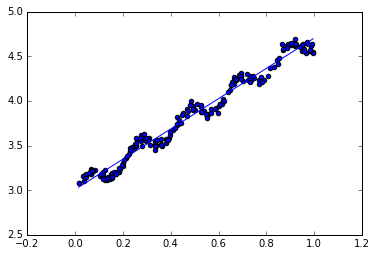

In [85]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws
ax.plot(xCopy[:,1],yHat)
plt.show()

In [86]:
yHat=xMat*ws
corrcoef(yHat.T,yMat)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

In [87]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [88]:
xArr,yArr=loadDataSet('ex0.txt')

In [89]:
yArr[0]

3.176513

In [90]:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[ 3.12204471]])

In [91]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[ 3.20175729]])

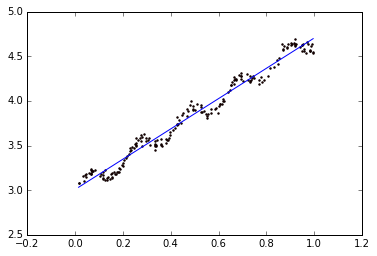

In [92]:
yHat=lwlrTest(xArr,xArr,yArr,1.0)
xMat=mat(xArr)
srtInd=xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0,:]
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0],s=2,c='red')
plt.show()

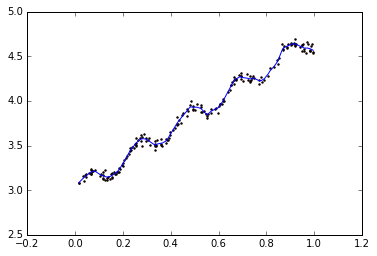

In [93]:
yHat=lwlrTest(xArr,xArr,yArr,0.01)
xMat=mat(xArr)
srtInd=xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0,:]
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0],s=2,c='red')
plt.show()

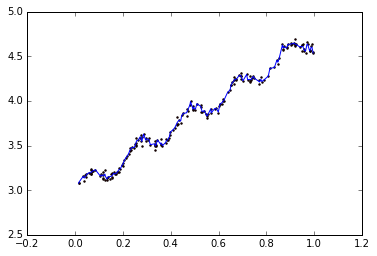

In [94]:
yHat=lwlrTest(xArr,xArr,yArr,0.003)
xMat=mat(xArr)
srtInd=xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0,:]
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0],s=2,c='red')
plt.show()

In [95]:
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()

In [96]:
abX,abY=loadDataSet('abalone.txt')
yHat01=lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1=lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10=lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [97]:
print rssError(abY[0:99],yHat01.T)
print rssError(abY[0:99],yHat1.T)
print rssError(abY[0:99],yHat10.T)

56.7848923016
429.89056187
549.118170882


In [98]:
yHat01=lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
print rssError(abY[100:199],yHat01.T)
yHat1=lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
print rssError(abY[100:199],yHat1.T)
yHat10=lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)
print rssError(abY[100:199],yHat10.T)

37359.648606
573.52614419
517.571190538


In [99]:
ws=standRegres(abX[0:99],abY[0:99])
yHat=mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

518.6363153244863

In [100]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + eye(shape(xMat)[1])*lam
    if linalg.det(denom) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = denom.I * (xMat.T*yMat)
    return ws
    
def ridgeTest(xArr,yArr):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean     #to eliminate X0 take mean off of Y
    #regularize X's
    xMeans = mean(xMat,0)   #calc mean then subtract it off
    xVar = var(xMat,0)      #calc variance of Xi then divide by it
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat

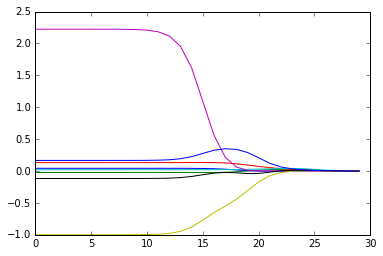

In [101]:
abX,abY=loadDataSet("abalone.txt")
ridgeWeights=ridgeTest(abX,abY)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [120]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   #calc mean then subtract it off
    inVar = var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean     #can also regularize ys but will get smaller coef
    xMat = regularize(xMat)
    m,n=shape(xMat)
    returnMat = zeros((numIt,n)) #testing code remove
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):#could change this to while loop
        #print ws.T
        lowestError = inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

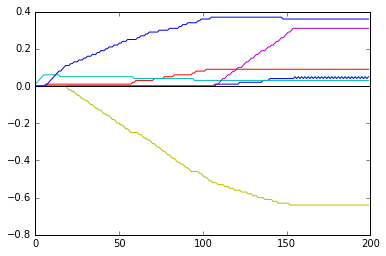

In [128]:
xArr,yArr=loadDataSet("abalone.txt")
Weight=stageWise(xArr,yArr,0.01,200)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(Weight)
plt.show()

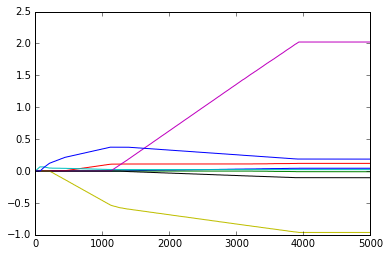

In [130]:
xArr,yArr=loadDataSet("abalone.txt")
Weight=stageWise(xArr,yArr,0.001,5000)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(Weight)
plt.show()

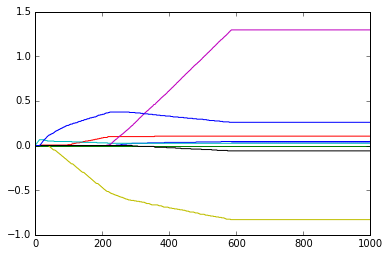

In [131]:
xArr,yArr=loadDataSet("abalone.txt")
Weight=stageWise(xArr,yArr,0.005,1000)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(Weight)
plt.show()

In [122]:
xMat=mat(xArr)
yMat=mat(yArr).T
xMat=regularize(xMat)
yM=mean(yMat,0)
yMat=yMat- yM
weights=standRegres(xMat,yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

In [135]:
def scrapePage(inFile,outFile,yr,numPce,origPrc):
    from BeautifulSoup import BeautifulSoup
    fr = open(inFile); fw=open(outFile,'a') #a is append mode writing
    soup = BeautifulSoup(fr.read())
    i=1
    currentRow = soup.findAll('table', r="%d" % i)
    while(len(currentRow)!=0):
        currentRow = soup.findAll('table', r="%d" % i)
        title = currentRow[0].findAll('a')[1].text
        lwrTitle = title.lower()
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
        soldUnicde = currentRow[0].findAll('td')[3].findAll('span')
        if len(soldUnicde)==0:
            print "item #%d did not sell" % i
        else:
            soldPrice = currentRow[0].findAll('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','') #strips out $
            priceStr = priceStr.replace(',','') #strips out ,
            if len(soldPrice)>1:
                priceStr = priceStr.replace('Free shipping', '') #strips out Free Shipping
            print "%s\t%d\t%s" % (priceStr,newFlag,title)
            fw.write("%d\t%d\t%d\t%f\t%s\n" % (yr,numPce,newFlag,origPrc,priceStr))
        i += 1
        currentRow = soup.findAll('table', r="%d" % i)
    fw.close()
    
def setDataCollect():
    scrapePage('setHtml/lego8288.html','out.txt', 2006, 800, 49.99)
    scrapePage('setHtml/lego10030.html','out.txt', 2002, 3096, 269.99)
    scrapePage('setHtml/lego10179.html','out.txt', 2007, 5195, 499.99)
    scrapePage('setHtml/lego10181.html','out.txt', 2007, 3428, 199.99)
    scrapePage('setHtml/lego10189.html','out.txt', 2008, 5922, 299.99)
    scrapePage('setHtml/lego10196.html','out.txt', 2009, 3263, 249.99)

In [142]:
lgX=[];lgY=[]
lgX,lgY=loadDataSet("out.txt")

In [144]:
shape(lgX),shape(lgY)

((63, 4), (63,))

In [146]:
lgX1=mat(ones((63,5)))
lgX1[:,1:5]=mat(lgX)

In [147]:
lgX[0]

[2006.0, 800.0, 0.0, 49.99]

In [148]:
lgX1[0]

matrix([[  1.00000000e+00,   2.00600000e+03,   8.00000000e+02,
           0.00000000e+00,   4.99900000e+01]])

In [149]:
ws=standRegres(lgX1,lgY)

In [152]:
ws

matrix([[  5.53199701e+04],
        [ -2.75928219e+01],
        [ -2.68392234e-02],
        [ -1.12208481e+01],
        [  2.57604055e+00]])

In [157]:
lgX1[0]*ws

matrix([[ 76.0741884]])

In [158]:
lgX1[-1]*ws

matrix([[ 431.17797659]])

In [159]:
lgX1[43]*ws

matrix([[ 516.20733092]])

In [160]:
def crossValidation(xArr,yArr,numVal=10):
    m = len(yArr)                           
    indexList = range(m)
    errorMat = zeros((numVal,30))#create error mat 30columns numVal rows
    for i in range(numVal):
        trainX=[]; trainY=[]
        testX = []; testY = []
        random.shuffle(indexList)
        for j in range(m):#create training set based on first 90% of values in indexList
            if j < m*0.9: 
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX,trainY)    #get 30 weight vectors from ridge
        for k in range(30):#loop over all of the ridge estimates
            matTestX = mat(testX); matTrainX=mat(trainX)
            meanTrain = mean(matTrainX,0)
            varTrain = var(matTrainX,0)
            matTestX = (matTestX-meanTrain)/varTrain #regularize test with training params
            yEst = matTestX * mat(wMat[k,:]).T + mean(trainY)#test ridge results and store
            errorMat[i,k]=rssError(yEst.T.A,array(testY))
            #print errorMat[i,k]
    meanErrors = mean(errorMat,0)#calc avg performance of the different ridge weight vectors
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors==minMean)]
    #can unregularize to get model
    #when we regularized we wrote Xreg = (x-meanX)/var(x)
    #we can now write in terms of x not Xreg:  x*w/var(x) - meanX/var(x) +meanY
    xMat = mat(xArr); yMat=mat(yArr).T
    meanX = mean(xMat,0); varX = var(xMat,0)
    unReg = bestWeights/varX
    print "the best model from Ridge Regression is:\n",unReg
    print "with constant term: ",-1*sum(multiply(meanX,unReg)) + mean(yMat)

In [184]:
crossValidation(lgX,lgY,10)

the best model from Ridge Regression is:
[[ -2.76688859e+01   1.06685864e-03  -7.10478931e+00   1.88043772e+00]]
with constant term:  55582.5307559


In [185]:
ridgeTest(lgX,lgY)

array([[ -1.45288906e+02,  -8.39360442e+03,  -3.28682450e+00,
          4.42362406e+04],
       [ -1.46649725e+02,  -1.89952152e+03,  -2.80638599e+00,
          4.27891633e+04],
       [ -1.44450432e+02,   8.55488076e+02,  -1.35089285e+00,
          4.00885735e+04],
       [ -1.37402474e+02,   1.64217093e+03,   1.95840783e+00,
          3.44932120e+04],
       [ -1.24750588e+02,   1.44326171e+03,   7.62540167e+00,
          2.50647592e+04],
       [ -1.10234679e+02,   8.81842164e+02,   1.40617304e+01,
          1.43874420e+04],
       [ -9.96484167e+01,   4.17805568e+02,   1.87140361e+01,
          6.66770425e+03],
       [ -9.40345090e+01,   1.71289137e+02,   2.10844952e+01,
          2.71206176e+03],
       [ -9.11400659e+01,   6.57287394e+01,   2.20487105e+01,
          1.03800465e+03],
       [ -8.86246985e+01,   2.45452725e+01,   2.23181664e+01,
          3.87564774e+02],
       [ -8.41447674e+01,   9.05861459e+00,   2.21495534e+01,
          1.43313895e+02],
       [ -7.44804291e